# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import requests
import tweepy
import os
import json
import time
import re
import warnings
from IPython.display import Image
from functools import reduce

In [3]:
twi_arch_enhanced = pd.read_csv('twitter-archive-enhanced.csv')
twi_arch_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
img_request = requests.get(url, allow_redirects=True)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(img_request.content)

img_pred = pd.read_csv('image-predictions.tsv', sep='\t' )
img_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
with open('tweet-json.txt', mode='r') as file:
    data = [json.loads(line) for line in file]

twe_json = pd.read_json(json.dumps(data))
twe_json.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [6]:
twi_arch_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [7]:
twi_arch_enhanced['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [8]:
twe_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [9]:
img_pred.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [10]:
img_pred['jpg_url'].duplicated().sum()

66

In [11]:
img_pred['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [12]:
img_pred['p2'].value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

In [13]:
img_pred['p3'].value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ox                     1
assault_rifle          1
axolotl                1
pot                    1
banana                 1
Name: p3, Length: 408, dtype: int64

### Quality issues
1. In twi_arch_enhanced, Remove retweet

2. In twi_arch_enhanced, drop useless column

3. In twi_arch_enhanced, Dog names not corrected, there are some value like ['such', 'a', 'quite', 'not', 'one', 'an', 'very', 'just', 'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially']

4. In twe_json, drop useless column

5. In twi_arch_enhanced, the timestamp column must be datetime not string

6. In twi_arch_enhanced, keep only date for 'timestamp' column

7. In img_pred, drop duplicate at 'jpg_url' column

8. In img_pred, 'p1,p2,p3' columns: dog breeds are not consistently lower or uppercase

### Tidiness issues
1. Merge doggo, floofer, pupper, puppo columns

2. Merge 3 datasets into one using inner join according to the tweet_id

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [14]:
# Make copies of original pieces of data
twi_arch_enhanced_clean = twi_arch_enhanced.copy()
img_pred_clean = img_pred.copy()
twe_json_clean = twe_json.copy()

### Issue #1:

#### Define: In twi_arch_enhanced, remove retweet

#### Code

In [15]:
twi_arch_enhanced_clean = twi_arch_enhanced_clean[twi_arch_enhanced_clean['retweeted_status_id'].isnull()]

#### Test

In [16]:
twi_arch_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

### Issue #2:

#### Define: In twi_arch_enhanced, drop useless column

#### Code

In [17]:
twi_arch_enhanced_clean = twi_arch_enhanced_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_timestamp', 'retweeted_status_id', 
                                                    'retweeted_status_user_id', 'expanded_urls'], axis=1)

#### Test

In [18]:
twi_arch_enhanced_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Issue #3:

#### Define: In twi_arch_enhanced, Dog names not corrected, there are some value like ['such', 'a', 'quite', 'not', 'one', 'an', 'very', 'just', 'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially']

#### Code

In [19]:
word = ['such', 'a', 'quite', 'not', 'one', 'an', 'very', 'just', 'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially']

In [20]:
for dog_name in word:
    twi_arch_enhanced_clean.loc[twi_arch_enhanced_clean.name == dog_name, 'name'] = None

#### Test

In [21]:
twi_arch_enhanced_clean['name'].value_counts()

None          680
Charlie        11
Lucy           11
Cooper         10
Oliver         10
             ... 
Shiloh          1
Gustav          1
Arlen           1
Lenox           1
Christoper      1
Name: name, Length: 938, dtype: int64

### Issue #4: 

#### Define: In twe_json, drop useless column

#### Code

In [22]:
twe_json_clean = twe_json_clean.drop(['contributors', 'coordinates', 'geo', 'extended_entities', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status', 'quoted_status_id', 'quoted_status_id_str', 'retweeted_status'], axis=1)

#### Test

In [23]:
twe_json_clean.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'source', 'user', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang'],
      dtype='object')

### Issue #5: 

#### Define: In twi_arch_enhanced, the timestamp column must be datetime not string

#### Code

In [24]:
twi_arch_enhanced_clean['timestamp'] = pd.to_datetime(twi_arch_enhanced_clean['timestamp'])

### Test

In [25]:
twi_arch_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   int64              
 5   rating_denominator  2175 non-null   int64              
 6   name                2078 non-null   object             
 7   doggo               2175 non-null   object             
 8   floofer             2175 non-null   object             
 9   pupper              2175 non-null   object             
 10  puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 203.9+ KB


### Issue #6: 

#### Define: In twi_arch_enhanced, keep only date for 'timestamp' column

#### Code

In [26]:
twi_arch_enhanced_clean['timestamp'] = twi_arch_enhanced_clean['timestamp'].apply(lambda x: x.date())

### Test

In [27]:
twi_arch_enhanced_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


### Issue #7: 

#### Define: In img_pred, drop duplicate at 'jpg_url' column

#### Code

In [28]:
img_pred_clean = img_pred_clean.drop_duplicates(['jpg_url'])

#### Test

In [29]:
img_pred_clean['jpg_url'].duplicated().sum()

0

### Issue #8: 

#### Define: In img_pred, 'p1,p2,p3' columns: dog breeds are not consistently lower or uppercase

#### Code

In [30]:
column = ['p1', 'p2', 'p3']
for word in column:
    img_pred_clean[word] = img_pred_clean[word].str.lower()

#### Test

In [31]:
img_pred_clean['p1'].value_counts()

golden_retriever      139
labrador_retriever     95
pembroke               88
chihuahua              79
pug                    55
                     ... 
cheeseburger            1
fiddler_crab            1
bannister               1
crane                   1
orange                  1
Name: p1, Length: 378, dtype: int64

### Issue #9: 

#### Define: Merge doggo, floofer, pupper, puppo columns into 1 column

#### Code

In [32]:
#Change None value to ''
twi_arch_enhanced_clean['doggo'] = twi_arch_enhanced_clean['doggo'].replace(['None'],'')
twi_arch_enhanced_clean['floofer'] = twi_arch_enhanced_clean['floofer'].replace(['None'],'')
twi_arch_enhanced_clean['pupper'] = twi_arch_enhanced_clean['pupper'].replace(['None'],'')
twi_arch_enhanced_clean['puppo'] = twi_arch_enhanced_clean['puppo'].replace(['None'],'')

In [33]:
#Merge columns into 1
twi_arch_enhanced_clean['dog_breed'] = twi_arch_enhanced_clean['doggo'] + twi_arch_enhanced_clean['floofer'] + twi_arch_enhanced_clean['pupper'] + twi_arch_enhanced_clean['puppo']

In [34]:
twi_arch_enhanced_clean['dog_breed'] = twi_arch_enhanced_clean['dog_breed'].replace(['doggopupper','doggopuppo', 'doggofloofer'],['doggo & pupper','doggo & puppo', 'doggo & floofer'])

In [35]:
twi_arch_enhanced_clean = twi_arch_enhanced_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

#### Test

In [36]:
twi_arch_enhanced_clean.head(10)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_breed
0,892420643555336193,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,
1,892177421306343426,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,
2,891815181378084864,2017-07-31,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,
3,891689557279858688,2017-07-30,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,
4,891327558926688256,2017-07-29,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,
5,891087950875897856,2017-07-29,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,13,10,None,
6,890971913173991426,2017-07-28,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,
7,890729181411237888,2017-07-28,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,13,10,None,
8,890609185150312448,2017-07-27,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,13,10,Zoey,
9,890240255349198849,2017-07-26,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo


In [37]:
twi_arch_enhanced_clean['dog_breed'].value_counts()

                   1831
pupper              224
doggo                75
puppo                24
doggo & pupper       10
floofer               9
doggo & puppo         1
doggo & floofer       1
Name: dog_breed, dtype: int64

### Issue #10: 

#### Define: Merge 3 datasets into one using inner join according to the tweet_id

#### Code

In [38]:
twe_json_clean.rename(columns = {'id':'tweet_id'}, inplace = True)

In [39]:
#df = pd.concat(['twi_arch_enhanced_clean', 'img_pred_clean'])
df_twit = twi_arch_enhanced_clean.merge(img_pred_clean, on='tweet_id').merge(twe_json_clean, on='tweet_id')

#### Test

In [40]:
df_twit.head()

,tweet_id,timestamp,source_x,text,rating_numerator,rating_denominator,name,dog_breed,jpg_url,img_num,...,display_text_range,entities,source_y,user,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang
0,892420643555336193,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8853,39467,False,False,en
1,892177421306343426,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,6514,33819,False,False,en
2,891815181378084864,2017-07-31,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,4328,25461,False,False,en
3,891689557279858688,2017-07-30,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8964,42908,False,False,en
4,891327558926688256,2017-07-29,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,9774,41048,False,False,en


In [41]:
df_twit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   int64              
 1   timestamp           1994 non-null   object             
 2   source_x            1994 non-null   object             
 3   text                1994 non-null   object             
 4   rating_numerator    1994 non-null   int64              
 5   rating_denominator  1994 non-null   int64              
 6   name                1901 non-null   object             
 7   dog_breed           1994 non-null   object             
 8   jpg_url             1994 non-null   object             
 9   img_num             1994 non-null   int64              
 10  p1                  1994 non-null   object             
 11  p1_conf             1994 non-null   float64            
 12  p1_dog              1994 non-null 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [42]:
df_twit.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [43]:
df_twit.groupby('dog_breed')['favorite_count'].mean()

dog_breed
                    8478.924763
doggo              19356.380952
doggo & floofer    17169.000000
doggo & pupper     12533.111111
doggo & puppo      47844.000000
floofer            13206.000000
pupper              7197.738916
puppo              21582.090909
Name: favorite_count, dtype: float64

In [44]:
df_twit.groupby('dog_breed')['retweet_count'].mean()

dog_breed
                    2577.957346
doggo               7125.698413
doggo & floofer     3433.000000
doggo & pupper      4083.444444
doggo & puppo      19196.000000
floofer             4968.714286
pupper              2363.581281
puppo               6473.954545
Name: retweet_count, dtype: float64

In [45]:
df_twit['name'].value_counts()

None          546
Charlie        11
Lucy           10
Cooper         10
Oliver         10
             ... 
Cora            1
Huxley          1
Bookstore       1
Jersey          1
Christoper      1
Name: name, Length: 919, dtype: int64

### Insights:
1. Doggo & puppo is having the most favorite count

2. Doggo & puppo is also having the most retweet count

3. The most popular dog names in this dataset is Charlie

### Visualization

In [46]:
#remove None value
most_popular_name = df_twit['name'].value_counts()[1:9]

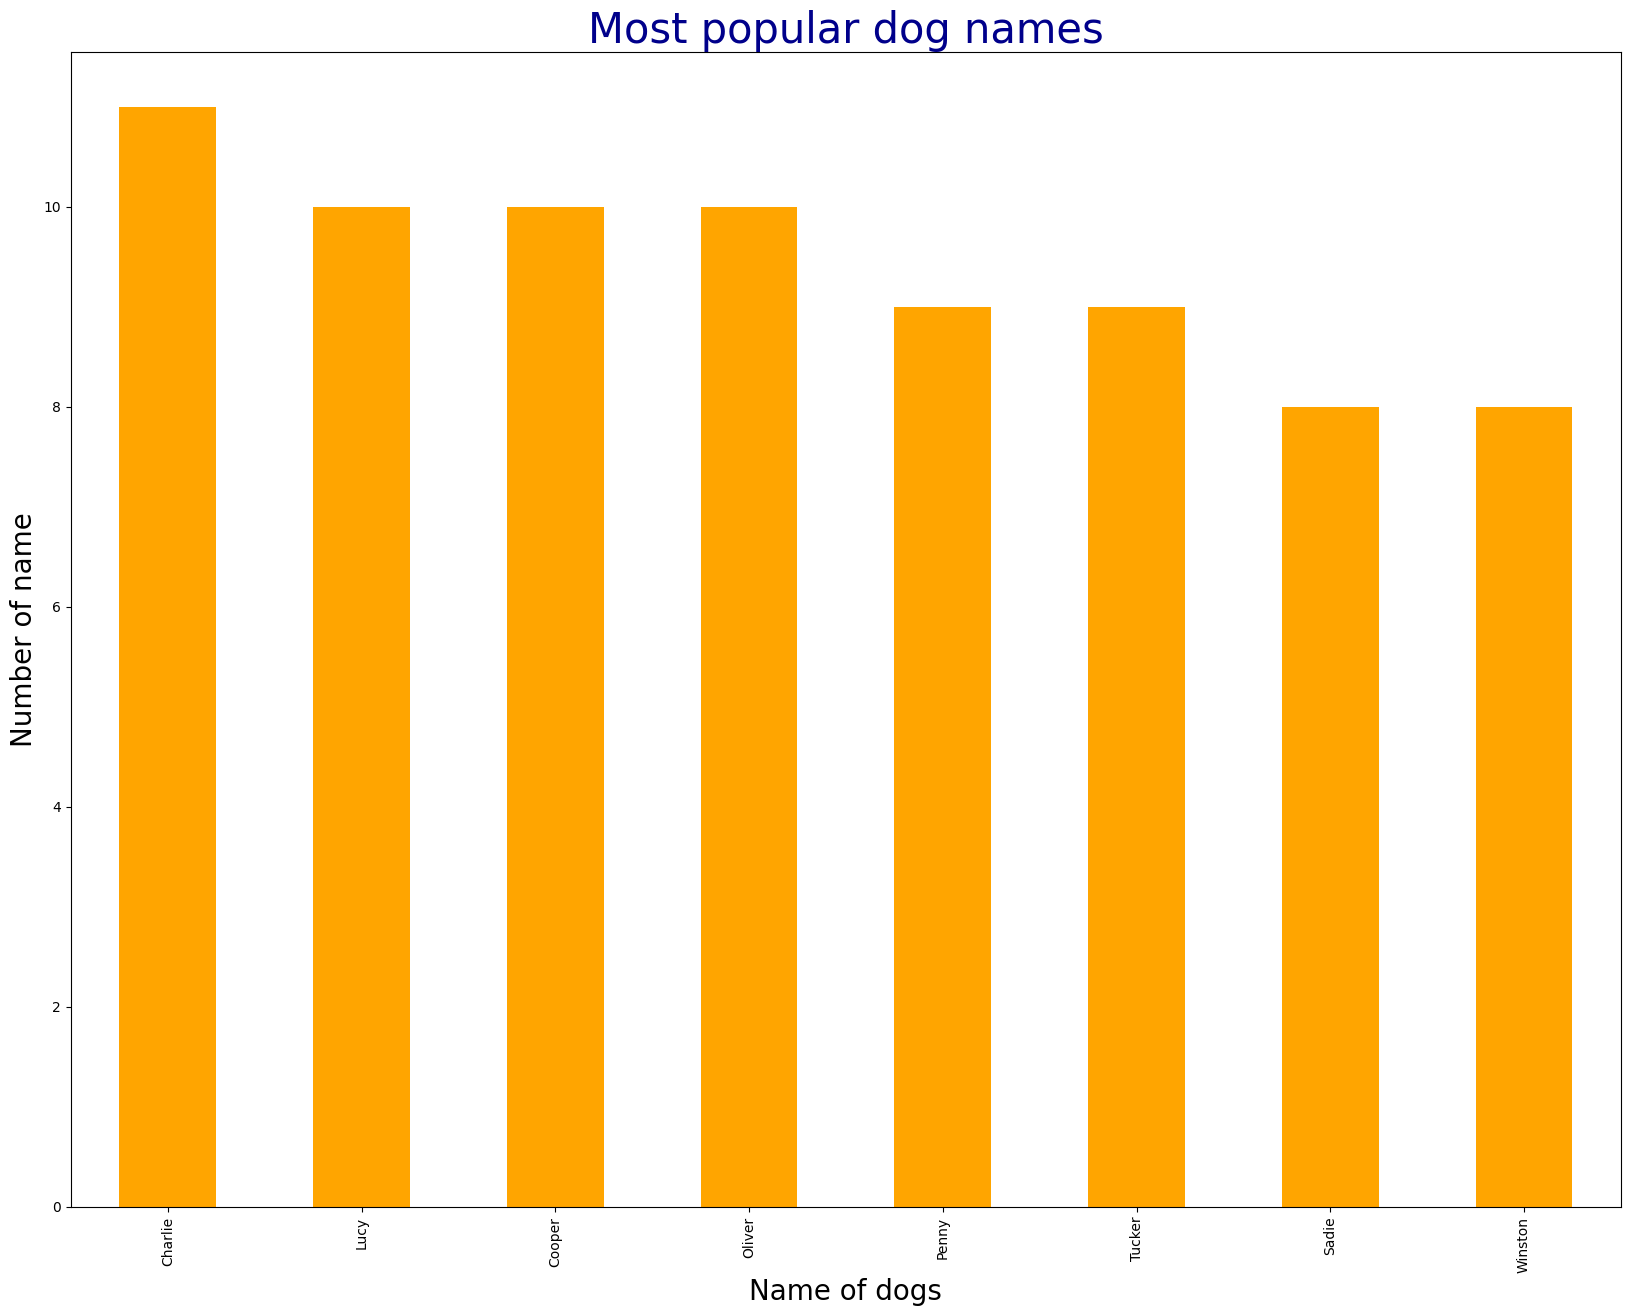

In [47]:
most_popular_name.plot(kind='bar', color='orange', figsize=(20, 15))
plt.title('Most popular dog names', size=30, color='darkblue')
plt.xlabel('Name of dogs', size=20)
plt.ylabel('Number of name', size=20)
plt.show()